In [26]:
import cv2                 # working with, mainly resizing, images
import numpy as np         # dealing with arrays
import os                  # dealing with directories
from random import shuffle # mixing up or currently ordered data that might lead our network astray in training.
from tqdm import tqdm      # a nice pretty percentage bar for tasks. Thanks to viewer Daniel BA1/4hler for this suggestion

from keras.layers import Input, Dense, Activation, BatchNormalization, Flatten, Conv2D
from keras.layers import MaxPooling2D, Dropout
from keras.models import Model, load_model, Sequential
from keras.applications.vgg16 import VGG16
from keras.optimizers import Adam, RMSprop
from keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt

TRAIN_DIR = 'train'
TEST_DIR = 'test'
IMG_SIZE = 128

In [ ]:
def label_img(img):
    # TODO
    pass

In [5]:
def create_train_data():
    training_data = []
    for img in tqdm(os.listdir(TRAIN_DIR)):
        label = label_img(img)
        path = os.path.join(TRAIN_DIR,img)
        img = cv2.imread(path)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        training_data.append([np.array(img),np.array(label)])
    shuffle(training_data)
    np.save('train_data_vgg16.npy', training_data)
    return training_data

In [6]:
train = create_train_data()
# train = np.load("train_data_vgg16.npy", allow_pickle=True)
print(train[0])

100%|██████████| 20000/20000 [07:28<00:00, 44.62it/s]


[array([[[ 55,  45,  90],
        [ 79,  72, 103],
        [133, 131, 140],
        ...,
        [124, 123, 129],
        [121, 118, 123],
        [105,  99, 104]],

       [[ 58,  48,  96],
        [ 70,  63,  97],
        [121, 118, 131],
        ...,
        [120, 118, 124],
        [117, 114, 119],
        [108, 102, 107]],

       [[ 58,  50, 102],
        [ 60,  53,  93],
        [100,  97, 116],
        ...,
        [116, 113, 119],
        [116, 111, 117],
        [112, 106, 111]],

       ...,

       [[ 71,  62,  59],
        [ 74,  62,  57],
        [ 82,  65,  58],
        ...,
        [106,  71,  58],
        [ 98,  64,  51],
        [107,  75,  61]],

       [[ 64,  53,  49],
        [ 69,  55,  50],
        [ 76,  58,  51],
        ...,
        [104,  63,  49],
        [ 98,  60,  46],
        [107,  69,  55]],

       [[ 71,  59,  55],
        [ 74,  59,  52],
        [ 74,  55,  47],
        ...,
        [111,  67,  50],
        [110,  69,  52],
        [116,  76,  58]

In [7]:
def create_test_data():
    testing_data = []
    for img in tqdm(os.listdir(TEST_DIR)):
        label = label_img(img)
        path = os.path.join(TEST_DIR,img)
        img = cv2.imread(path)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        testing_data.append([np.array(img),np.array(label)])
    shuffle(testing_data)
    np.save('test_data_vgg16.npy', testing_data)
    return testing_data

In [8]:
test = create_test_data()
# test = np.load("test_data_vgg16.npy", allow_pickle=True)
print(test[0])

100%|██████████| 5000/5000 [01:28<00:00, 56.31it/s]


[array([[[205, 203, 204],
        [209, 206, 208],
        [216, 213, 215],
        ...,
        [ 67,  69,  77],
        [ 66,  68,  76],
        [ 65,  67,  75]],

       [[205, 203, 204],
        [212, 209, 210],
        [220, 216, 217],
        ...,
        [ 70,  71,  80],
        [ 68,  70,  79],
        [ 67,  69,  78]],

       [[211, 209, 209],
        [215, 213, 213],
        [217, 214, 215],
        ...,
        [ 68,  69,  79],
        [ 66,  67,  77],
        [ 67,  68,  78]],

       ...,

       [[214, 199, 221],
        [203, 188, 209],
        [227, 213, 232],
        ...,
        [247, 236, 252],
        [250, 238, 254],
        [251, 236, 251]],

       [[214, 199, 220],
        [220, 204, 225],
        [225, 211, 231],
        ...,
        [247, 234, 250],
        [245, 231, 248],
        [249, 233, 250]],

       [[213, 198, 219],
        [216, 201, 222],
        [224, 210, 229],
        ...,
        [253, 239, 255],
        [253, 237, 254],
        [249, 232, 250]

In [16]:
train_X_list = []
train_Y_list = []
test_X_list = []
test_Y_list = []

In [17]:
for i in range(len(train)):
    train_X_list.append(train[i][0].reshape(IMG_SIZE, IMG_SIZE, 3))
    train_Y_list.append(train[i][1])

for i in range(len(test)):
    test_X_list.append(test[i][0].reshape(IMG_SIZE, IMG_SIZE, 3))
    test_Y_list.append(test[i][1])

In [18]:
train_X = np.array(train_X_list)
train_Y = np.array(train_Y_list)
test_X = np.array(test_X_list)
test_Y = np.array(test_Y_list)

In [27]:
model = VGG16(include_top=False, weights='imagenet', input_tensor=None, input_shape=train_X.shape[1:], pooling='max', classes=2)

In [58]:
# model.save("vgg16_2class.h5")
model = load_model("vgg16_2class.h5")
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 128, 128, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0         
__________

In [59]:
for layer in model.layers[:-5]:
    layer.trainable = False
    
for layer in model.layers:
    print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x000001D8D9DB7BE0> False
<keras.layers.convolutional.Conv2D object at 0x000001D8D9DB7C50> False
<keras.layers.convolutional.Conv2D object at 0x000001D8D9DB7E80> False
<keras.layers.pooling.MaxPooling2D object at 0x000001D8D9DB7F28> False
<keras.layers.convolutional.Conv2D object at 0x000001D8DA3E2128> False
<keras.layers.convolutional.Conv2D object at 0x000001D8DA3E2208> False
<keras.layers.pooling.MaxPooling2D object at 0x000001D8DA3E25F8> False
<keras.layers.convolutional.Conv2D object at 0x000001D8DA3E26A0> False
<keras.layers.convolutional.Conv2D object at 0x000001D8DA3E2588> False
<keras.layers.convolutional.Conv2D object at 0x000001D8DA3E2898> False
<keras.layers.pooling.MaxPooling2D object at 0x000001D8DA3E2A20> False
<keras.layers.convolutional.Conv2D object at 0x000001D8DA3E2AC8> False
<keras.layers.convolutional.Conv2D object at 0x000001D8DA3E2C50> False
<keras.layers.convolutional.Conv2D object at 0x000001D8DA3E2DD8> False
<ker

In [60]:
model_final = Sequential()

model_final.add(model)
model_final.add(Dense(1024, activation='relu', name='fc1'))
model_final.add(Dropout(rate=0.4))
model_final.add(Dense(1024, activation='relu', name='fc2'))
model_final.add(Dropout(rate=0.4))
model_final.add(Dense(2, activation='softmax', name='fc3'))

In [61]:
adam = Adam(lr=0.0001)

model_final.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

In [62]:
model_final.fit(train_X, train_Y, epochs=10, shuffle=True, validation_data=(test_X, test_Y), verbose=2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
 - 110s - loss: 1.6613 - acc: 0.8688 - val_loss: 0.3046 - val_acc: 0.8950
Epoch 2/10
 - 107s - loss: 0.2452 - acc: 0.8969 - val_loss: 0.2931 - val_acc: 0.8898
Epoch 3/10


KeyboardInterrupt: 

In [8]:
predict = model.evaluate(test_X, test_Y, verbose=2)

print("loss = " + str(predict[0]))
print("accuracy = " + str(predict[1]))

loss = 0.8719460931062698
accuracy = 0.8004


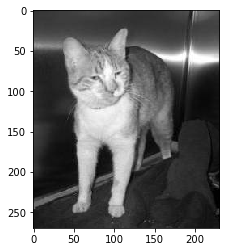

In [15]:
img_path = "test/cat.115.jpg"
img = cv2.imread(img_path,cv2.IMREAD_GRAYSCALE)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [16]:
img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))

pred = model.predict(img.reshape(1, IMG_SIZE, IMG_SIZE, 1))

if pred[0][0] > pred[0][1]:
    print("It's a cat!")
else:
    print("It's a dog!")

It's a cat!
